# Mind Map generator

In [14]:
import mindmap as mm
import networkx as nx
import re
import matplotlib.pyplot as plt

In [2]:
with open('./sample_text2.txt', encoding="utf8") as f:
    input_text = f.readlines()
final_text = ''
for text in input_text:
    final_text += text

In [3]:
final_text = mm.clean_text(final_text)

In [45]:
def load_text(file_name_path, encoding="utf8"):
    with open(file_name_path, encoding=encoding) as f:
        input_text = f.readlines()
        f.close()
    final_text = ''
    for text in input_text:
        final_text += text
    final_text = mm.clean_text(final_text)
    
    return final_text

In [4]:
final_text

'The electric vehicle (EV) revolution is speeding up, but it can only go so far without the necessary infrastructure and technology. As thinking shifts from fossil fuels to all-electric, visions of a brighter, more optimistic world come into view. The UK government’s pledge to ban the sale of all new non-electric cars, including gasoline, diesel and hybrid vehicles from 2035, highlights the drive to end the nation’s contribution to Climate Change by 2050. If the 2035 target is to be met, we will all see evolutions in the transport and mobility routines that keep our lives moving. From using ultra-fast wireless charging to supporting the developing world by repurposing car batteries, WMG, at the University of Warwick, is delivering advances in electrification knowledge and technologies, which will enable the leap to an electric automotive future. So, for the now and the near future, what do we need to consider? Demand for EVs is surging in the UK and registrations of plug-in cars increa

In [5]:
text = mm.generate_summary(final_text, top_n=40)

In [6]:
text

'So all in all you have a heavy , inefficient , cumbersome part . Because they are large , they are also heavy , which means the vehicle consumes more energy in a journey . Then , for safety reasons , currently affordable traction batteries need to have a high level of complexity . WMG ’ s involvement in the Nextrode project , funded by The Faraday Institution , is tackling this . As thinking shifts from fossil fuels to all-electric , visions of a brighter , more optimistic world come into view . So , for the now and the near future , what do we need to consider ? “ We aim to develop and integrate within a vehicle , a battery system based on a mixture of highly energy dense solid-state cells and high power density cells , ” says Greenwood . The electric vehicle ( EV ) revolution is speeding up , but it can only go so far without the necessary infrastructure and technology . The relationship between the charging infrastructure and the manufacture of the batteries is key , especially whe

In [7]:
keywords, topics = mm.create_keywords_from_text(final_text, max_nodes=5, sentence_group=4)

In [8]:
topics

{0: 'car',
 1: 'battery',
 2: 'need',
 3: 'charging',
 4: 'performance',
 5: 'cell',
 6: 'electric',
 7: 'project',
 8: 'road',
 9: 'current'}

In [9]:
for idx in range(len(keywords)):
    print(keywords[idx])

['repurposing car batteries', 'fast wireless charging', 'electric automotive future', 'near future', 'using ultra', 'supporting', 'need']
[]
['key ,” explains greenwood', 'class energy densities mean', 'desired electric range capability', 'efficient battery charging infrastructure', 'long charging times', 'need', 'technology']
['consumers ’ typical mobility behaviours', 'short journeys somewhat counteracts', 'robust battery charging infrastructure', 'deliver 300 miles', 'charging infrastructure', 'technology', 'consumers']
[]
['high power density cells ,” says greenwood', 'currently affordable traction batteries need', 'highly energy dense solid', 'cumbersome part .“', 'battery system based']
[]
['existing solutions .” although efficiency', 'zero ’ strategy — aiming', 'conventional vehicles offer today according', 'includes project partner a123 systems', '£ 2m innovate uk', 'supporting', 'consumers']
[]
[]


In [22]:
sent = 'key ,” explains greenwood'

In [25]:
re.sub('[^\d\w\s]', '', sent).strip()

'key  explains greenwood'

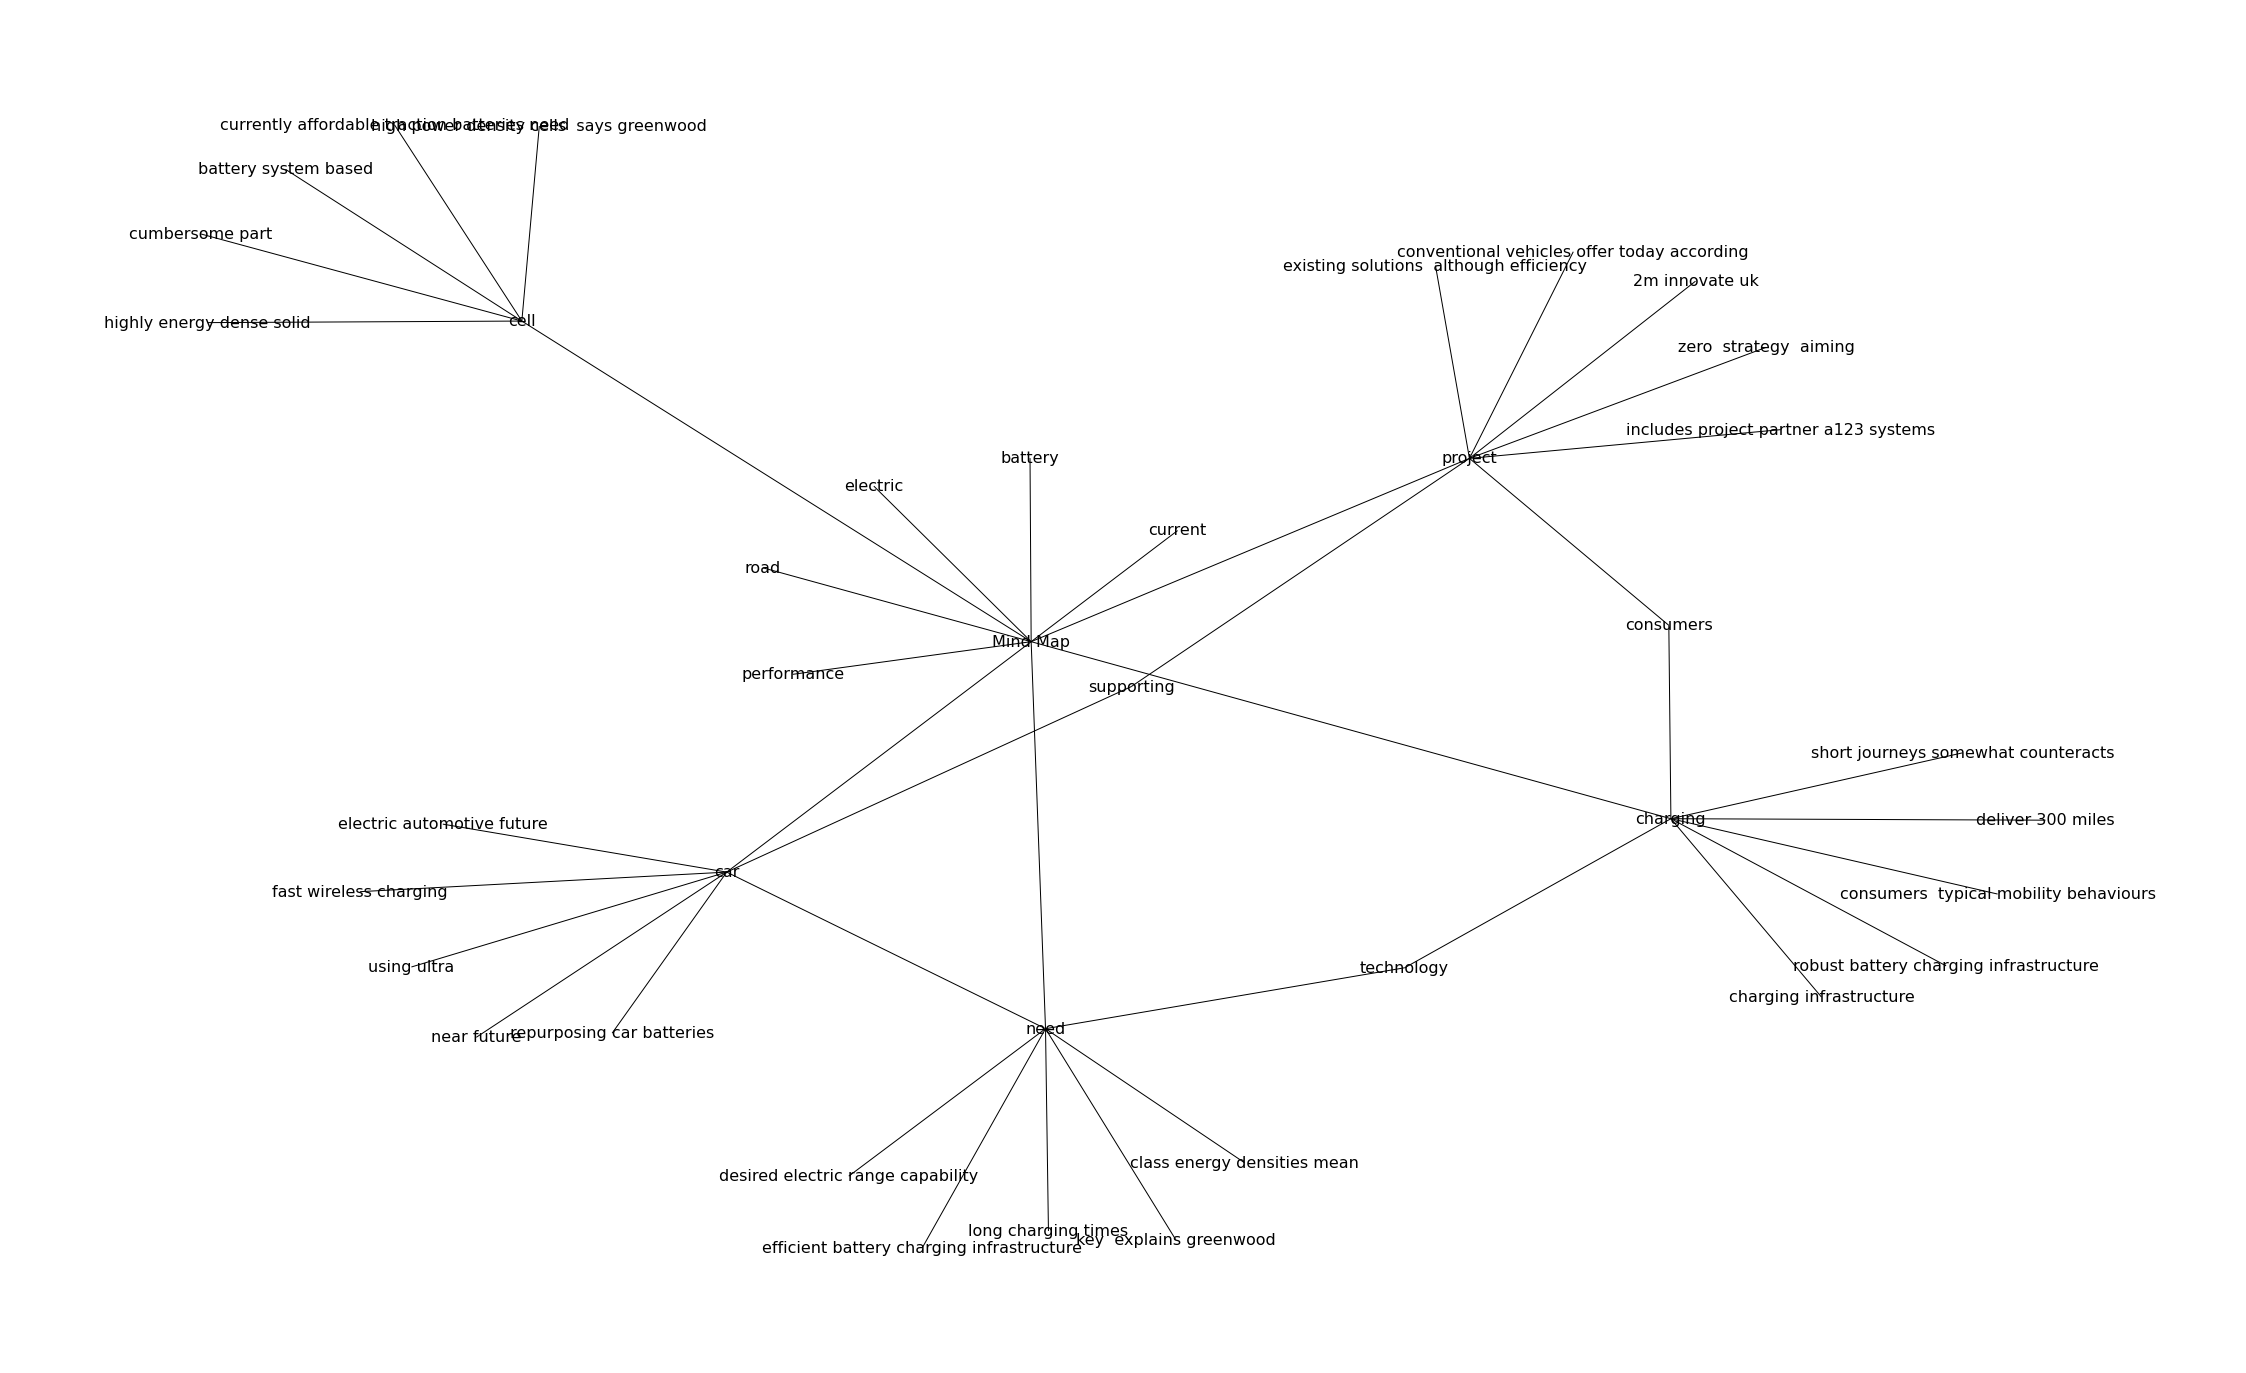

In [29]:
fig, ax = plt.subplots(figsize=(40,25))
G = nx.Graph()
G.add_node('Mind Map')
reg_exp_pattern = "[^\d\w\s]"
for idx in topics:
    main_topic = re.sub(reg_exp_pattern, '', topics[idx]).strip()
    G.add_edge('Mind Map', main_topic)
    topic_keywords = keywords[idx]
    for keyword in topic_keywords:
        keyword = re.sub(reg_exp_pattern, '', keyword).strip()
        if(keyword != main_topic):
            G.add_edge(main_topic, keyword)
        
nx.draw(G, with_labels=True, node_size=0, font_size = 16, )
plt.show()
# plt.savefig('second_mindmap.png')

In [47]:
final_text = load_text('./sample_text.txt')

In [30]:
def get_mindmap(keywords, topics):
    fig, ax = plt.subplots(figsize=(40,25))
    G = nx.Graph()
    G.add_node('Mind Map')
    reg_exp_pattern = "[^\d\w\s]"
    for idx in topics:
        main_topic = re.sub(reg_exp_pattern, '', topics[idx]).strip()
        G.add_edge('Mind Map', main_topic)
        topic_keywords = keywords[idx]
        for keyword in topic_keywords:
            keyword = re.sub(reg_exp_pattern, '', keyword).strip()
            if(keyword != re.sub(reg_exp_pattern, '', topics[idx]).strip()):
                G.add_edge(main_topic, keyword)

    nx.draw(G, with_labels=True, node_size=0, font_size = 16, )
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\nihal\\Anaconda3\\envs\\MLProjects\\lib\\site-packages\\matplotlib\\pyplot.py'>

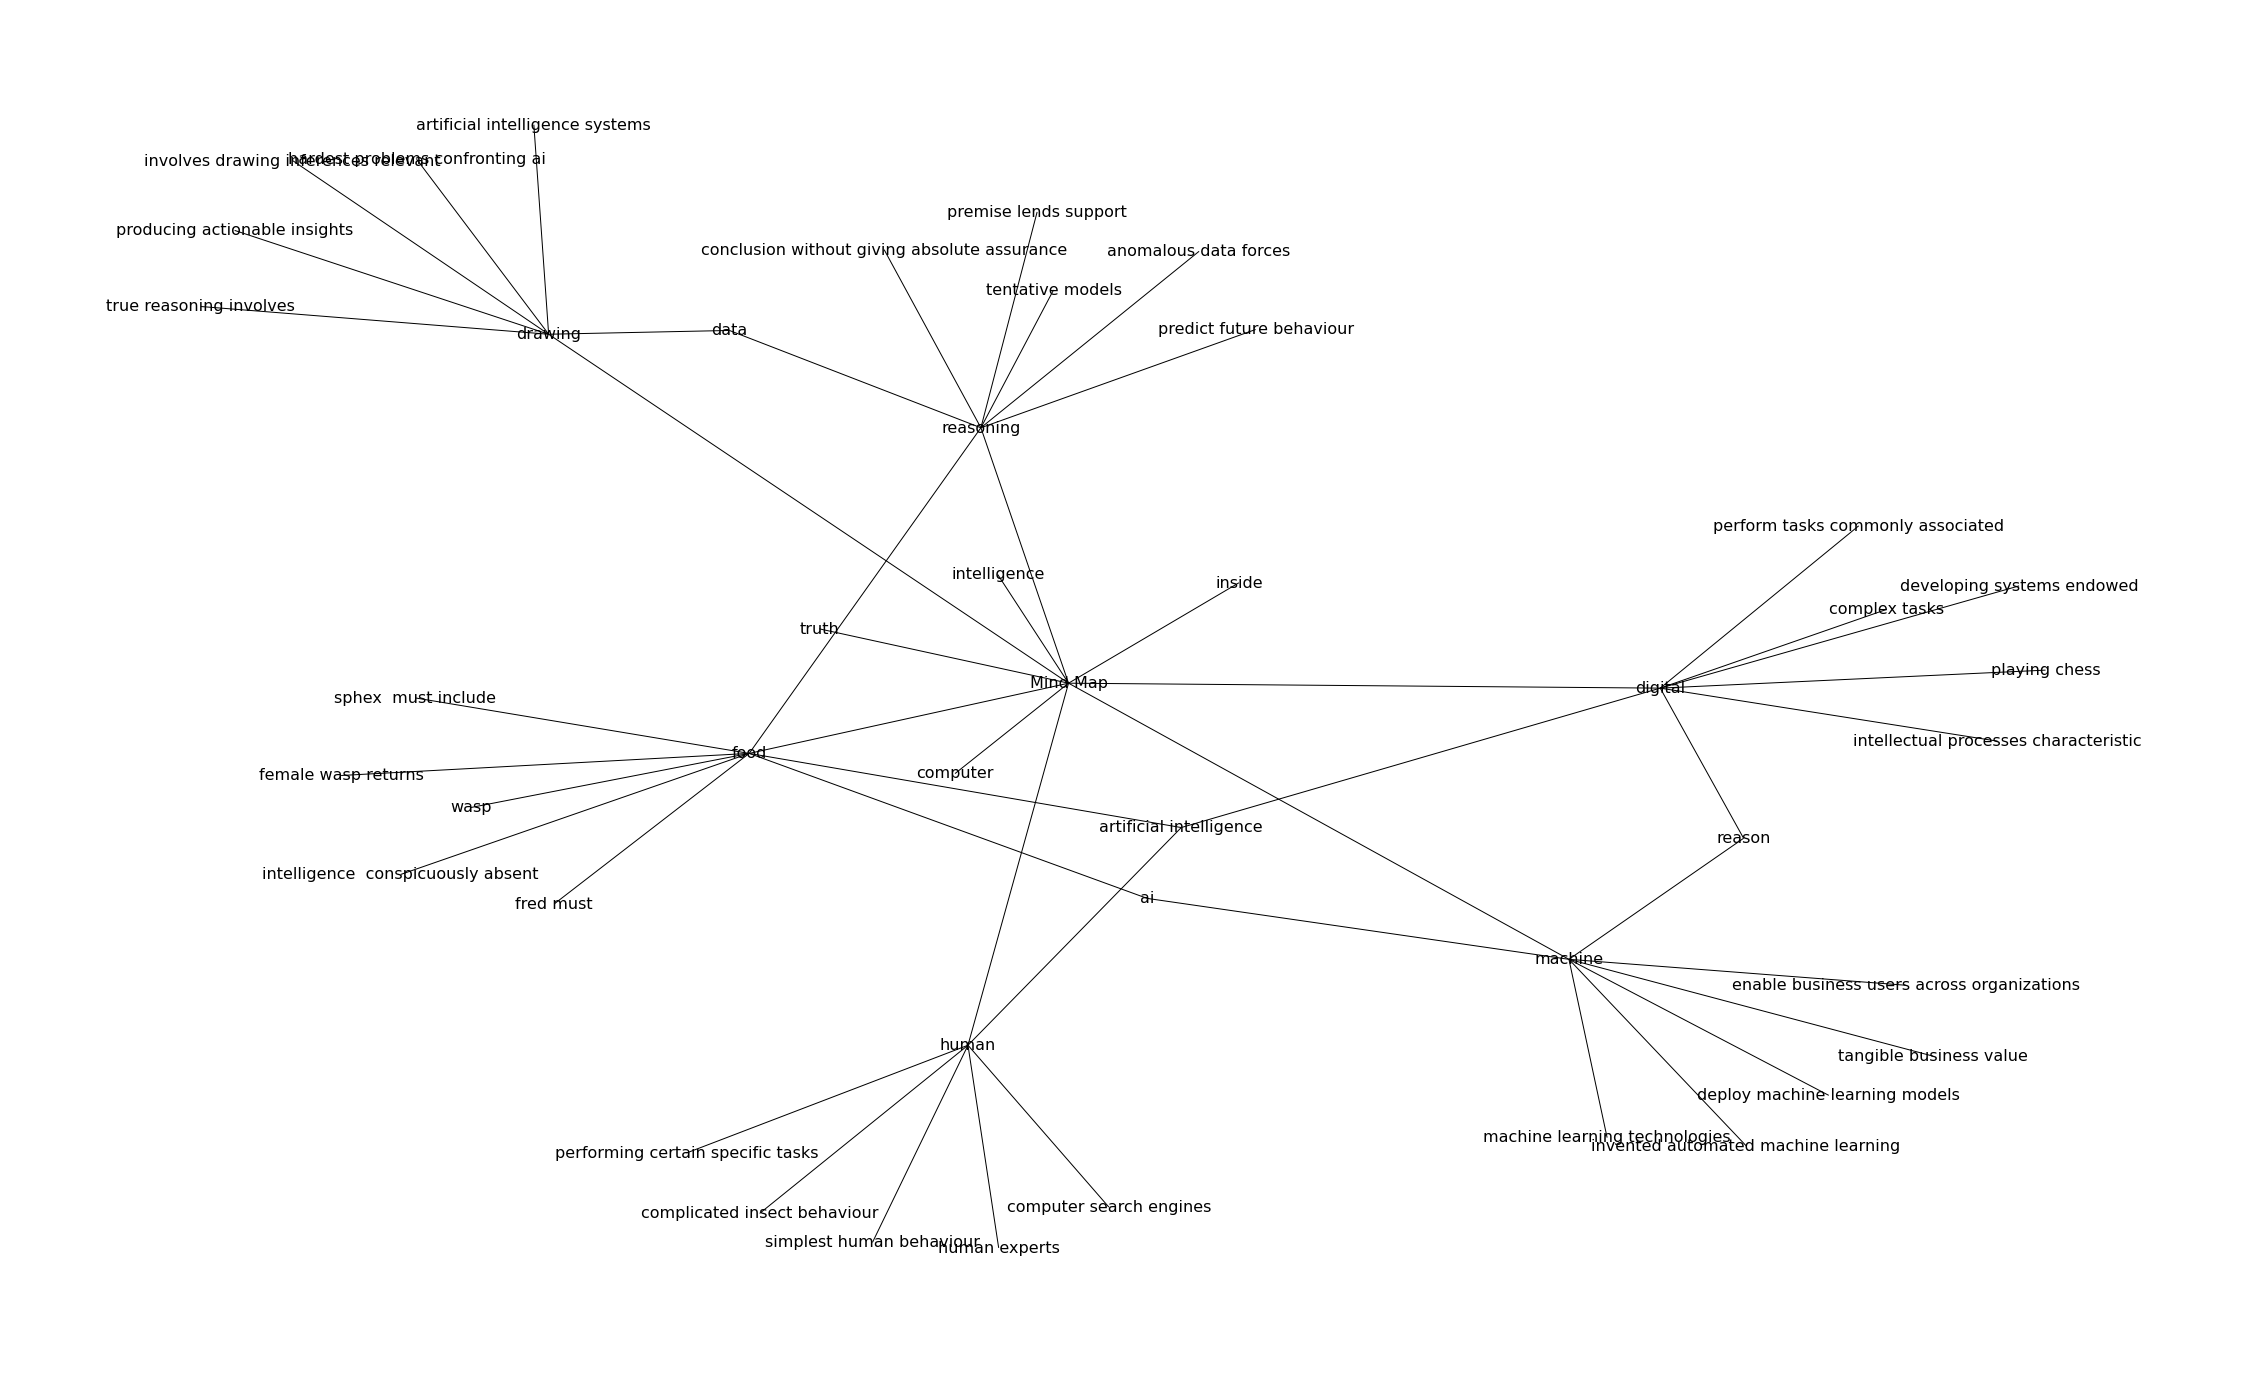

In [48]:
keywords2, topics2 = mm.create_keywords_from_text(final_text, max_nodes=5, sentence_group=4)
get_mindmap(keywords2, topics2)

## Web scrapped Example

In [36]:
scraped_data = mm.scrape_data('https://en.wikipedia.org/wiki/Wikipedia:About')
final_text = mm.clean_text(scraped_data)
summary = mm.generate_summary(final_text, top_n=40)
summary

"The ideal Wikipedia article is well written , balanced , neutral , and encyclopedic , containing comprehensive , notable , verifiable knowledge . Related projects include a dictionary , quotations , books , manuals , scientific reference sources , a travel guide , a data repository , and a news service ( see sister projects ) . The Signpost , a community-edited newspaper , has recent news and opinion regarding Wikipedia , its sister projects , and the Wikimedia Foundation . Wikipedia , in common with many websites , has a disclaimer that , at times , has led to commentators citing these to support the view that Wikipedia is unreliable . Some articles may also have links to dictionary definitions , audio-book readings , quotations , the same article in other languages , and further information on our sister projects . Anyone is allowed to add or edit words , references , images , and other media here . There is an established escalation-and-dispute process within Wikipedia and pages de

<module 'matplotlib.pyplot' from 'C:\\Users\\nihal\\Anaconda3\\envs\\MLProjects\\lib\\site-packages\\matplotlib\\pyplot.py'>

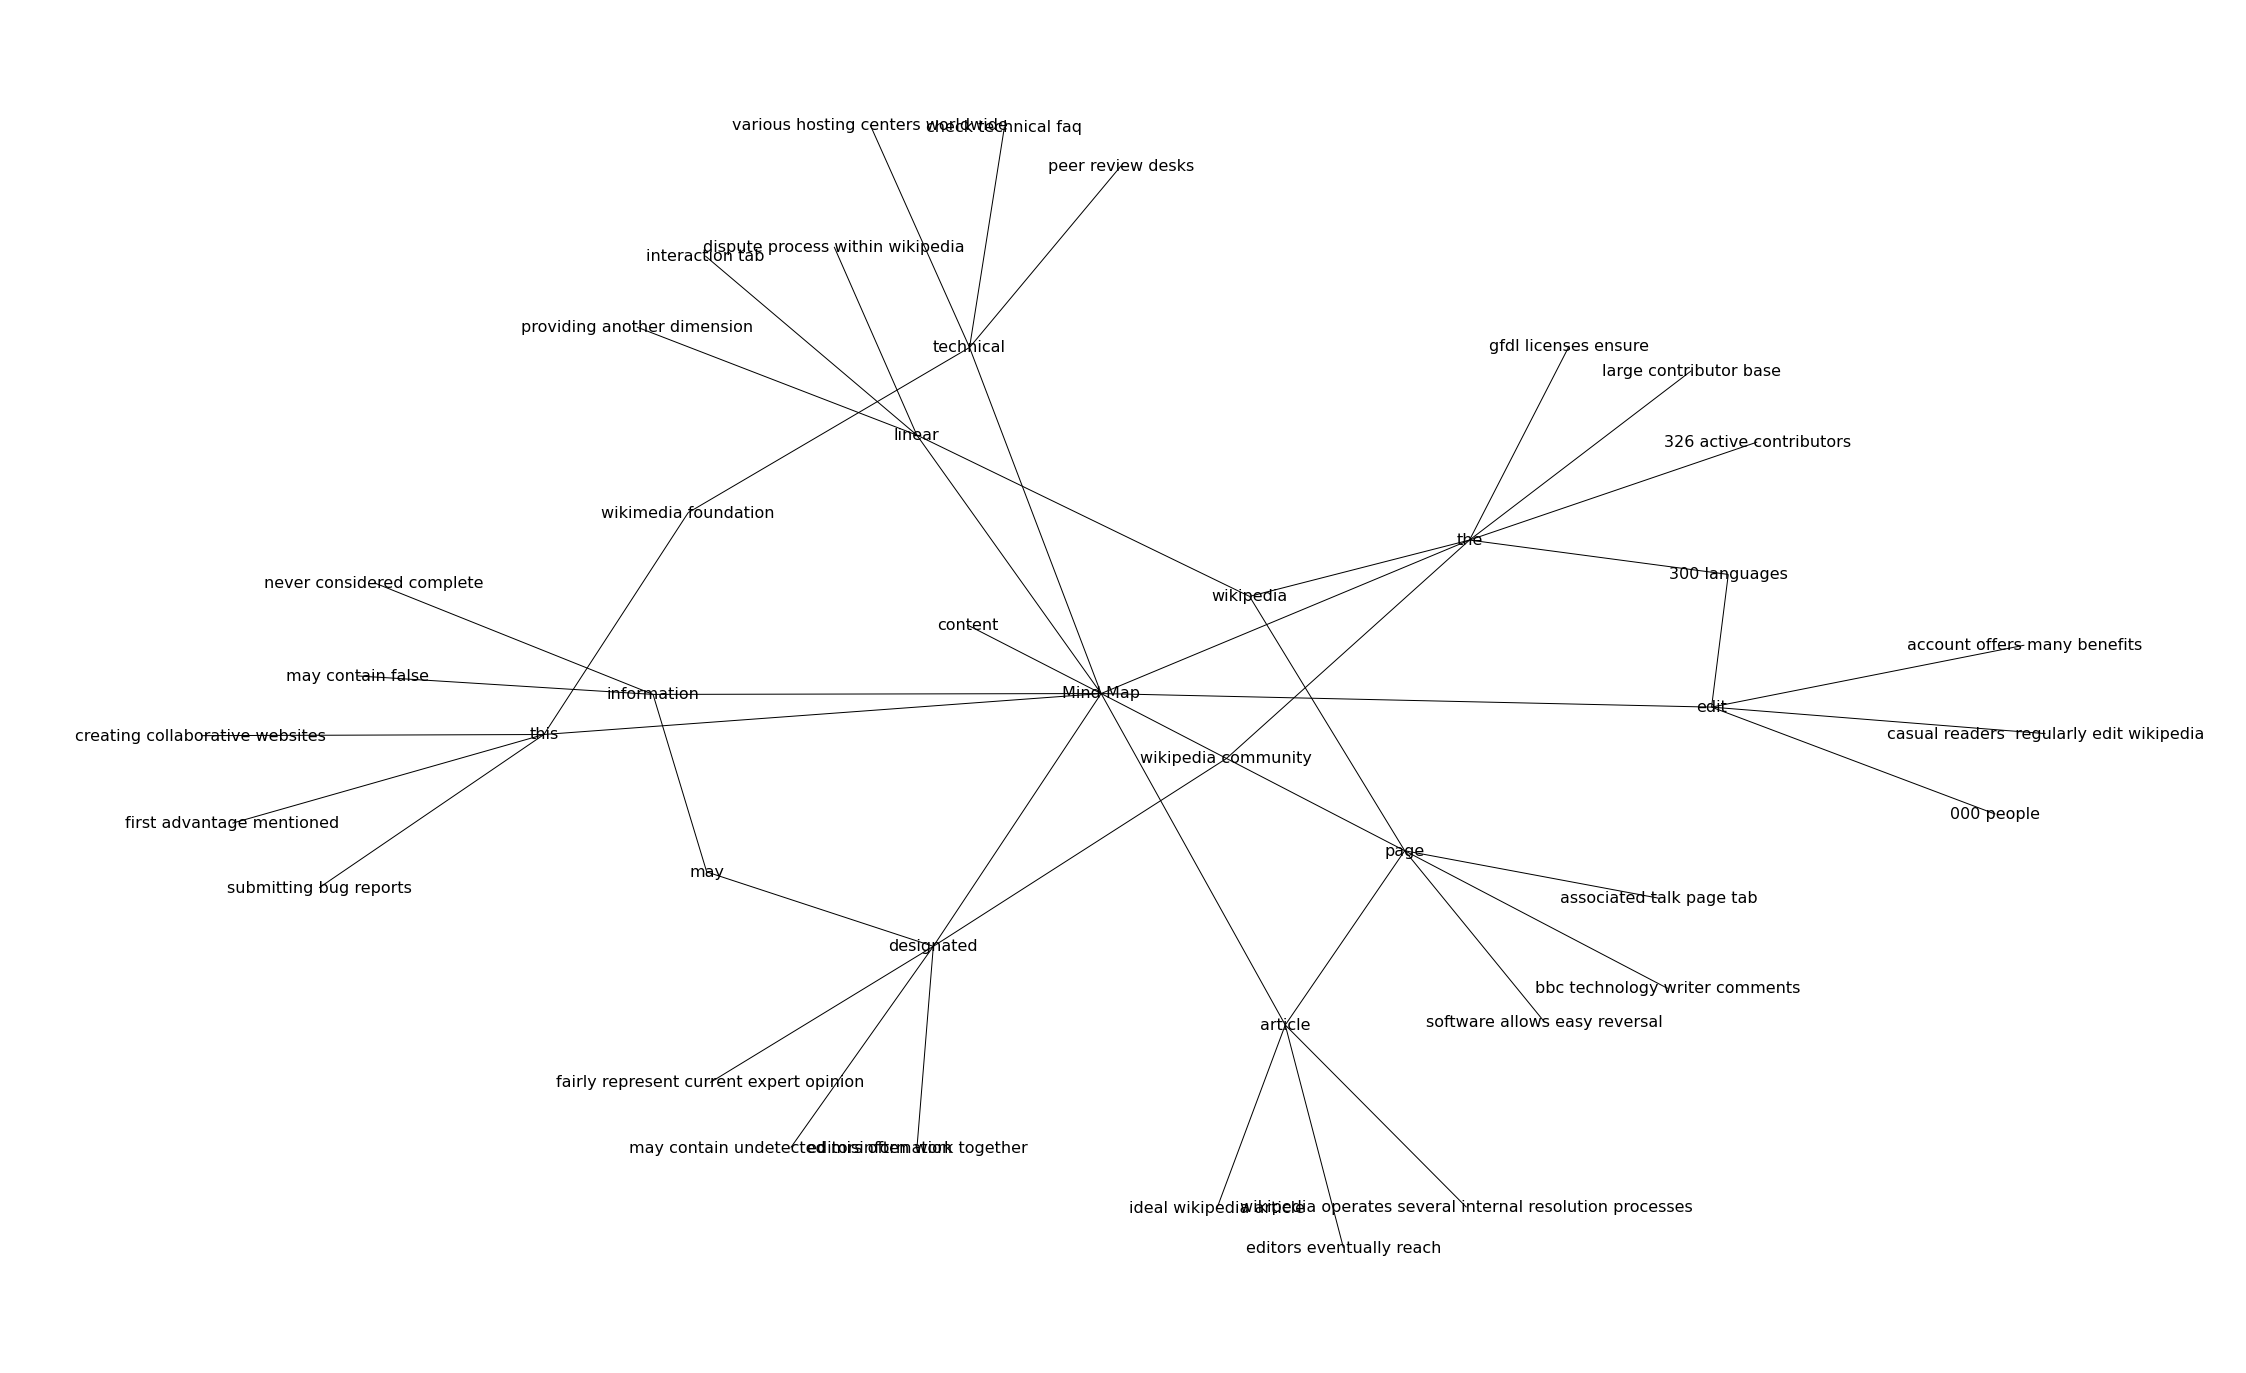

In [40]:
keywords2, topics2 = mm.create_keywords_from_text(final_text, max_nodes=3, sentence_group=7)
get_mindmap(keywords2, topics2)